Business Understanding


Data Understanding

Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [2]:
# Loading the datasets into DataFrames

stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
tests = pd.read_csv("test.csv")
transactions = pd.read_csv("transactions.csv")
holidays = pd.read_csv("holidays_events.csv")
oil = pd.read_csv("oil.csv")

# Exploring the various dataset

In [3]:
#Exploring the train dataset
#stores.info()
train.info()
#tests.info()
#transactions.info()
#train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [4]:
#Exploring the test dataset
tests.info()
tests.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


**The train and test data have similar columns except the sales column which is not in the test data.**

In [5]:
#Checking for missing values
missing_values1 = train.isnull().sum().sort_values(ascending =True)
missing_values1

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

**Both train and test data have no missing values.
Let's explore the other datasets


In [6]:
#Exploring the transactions dataset
transactions.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
#Exploring the Stores dataset
stores.info()

**The transaction and stores datasets have columns common to both test and train datasets. These columns can be used as a linking attribute (PK/FK) to merge the datasets on.**

In [7]:
#merging the datasets
df_train = train.merge(transactions, on = ['date', 'store_nbr'], how='left')
df_train = df_train.merge(stores, on = 'store_nbr', how='left')
#df_train1 = df_train1.merge(oil, on = 'date', how='left')
#df_train1 = train.merge(holidays, on = 'date', how='left')
#df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
#transactions.info()
df_train.info()
df_train.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   transactions  float64
 7   city          object 
 8   state         object 
 9   type          object 
 10  cluster       int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 274.7+ MB


,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000000000,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000000000,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000000000,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000000000,0,NaN,Quito,Pichincha,D,13


** Since we will Analysis of data set by Year, Month and Day, we will disaggregate the date column into Year, Month and Day columns so we can aggregate the data by those parameters**

In [8]:
#Breaking the year column into day, month, year, day of the week, and week.
df_train['date'] = pd.to_datetime(train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['week'] = df_train['date'].dt.isocalendar().week
df_train['quarter'] = df_train['date'].dt.quarter
df_train['day_of_week'] = df_train['date'].dt.day_name()
df_train

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,NaN,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000000000,0,NaN,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000000000,0,NaN,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000000000,0,NaN,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000000000,0,NaN,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133000000,0,2155.000000000,Quito,Pichincha,B,6,2017,8,15,33,3,Tuesday
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553000000,1,2155.000000000,Quito,Pichincha,B,6,2017,8,15,33,3,Tuesday
3000885,3000885,2017-08-15,9,PRODUCE,2419.729000000,148,2155.000000000,Quito,Pichincha,B,6,2017,8,15,33,3,Tuesday
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000000,8,2155.000000000,Quito,Pichincha,B,6,2017,8,15,33,3,Tuesday


In [9]:
missing_values = df_train.isnull().sum().sort_values(ascending =True)
missing_values

id                   0
week                 0
day                  0
month                0
year                 0
cluster              0
type                 0
quarter              0
state                0
onpromotion          0
sales                0
family               0
store_nbr            0
date                 0
city                 0
day_of_week          0
transactions    245784
dtype: int64

**The transactions data is missing 245784 values** Since the column contains the count of sales transactions for each date, store_nbr combination, we have to fill the missing data as it is important for our analysis. 
**We will be using the back fill method because analysis of the data shows that the rows have repeating values. 

In [10]:
#Filling the missing data using the Backfill method
df_train["transactions"].fillna(method='bfill', inplace=True)
df_train

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133000000,0,2155.000000000,Quito,Pichincha,B,6,2017,8,15,33,3,Tuesday
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553000000,1,2155.000000000,Quito,Pichincha,B,6,2017,8,15,33,3,Tuesday
3000885,3000885,2017-08-15,9,PRODUCE,2419.729000000,148,2155.000000000,Quito,Pichincha,B,6,2017,8,15,33,3,Tuesday
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000000,8,2155.000000000,Quito,Pichincha,B,6,2017,8,15,33,3,Tuesday


In [11]:
#reseting dataframe index 
df_train.reset_index(drop=True, inplace=True)

# Checking for missing dates

In [ ]:
#Checking for completeness of the dates
train.date.min(), train.date.max()
train['sales_date'] = pd.to_datetime(train['date']).dt.date
train['sales_date'].min(), train['sales_date'].max()

In [ ]:
#expected number of days (max dates - min dates)

difference =(train['sales_date'].max() - train['sales_date'].min())
difference.days + 1


In [ ]:
#Actual number of days
train['sales_date'].nunique()


In [ ]:
#Missing dates
expected_dates = pd.date_range(start =train['sales_date'].min(), end= train['sales_date'].max())
set(expected_dates.date) - set(train['sales_date'].unique())

From the result, the missing dates follows a sequence. All the years are missing dates of december 25th ( 12,25). This date is also a holiday in Ecuador. This analysis therfore assumes that no data was taken on this day every year as the shops may be closed down on that day each year. 

# QUESTIONS

# 1. Is the train dataset complete (has all the required dates)?

# 2. Which dates have the lowest and highest sales for each year?

In [12]:
sales_2013 =df_train.loc[df_train['year'] == 2013]
sales_2014 =df_train.loc[df_train['year'] == 2014]
sales_2015 =df_train.loc[df_train['year'] == 2015]
sales_2016 =df_train.loc[df_train['year'] == 2016]
sales_2017 =df_train.loc[df_train['year'] == 2017]
a= int(sales_2013['sales'].min())
b= int(sales_2014['sales'].min())
c= int(sales_2015['sales'].min())
d= int(sales_2016['sales'].min())
e= int(sales_2017['sales'].min())
a1= int(sales_2013['sales'].max())
b1= int(sales_2014['sales'].max())
c1= float(sales_2015['sales'].max())
d1= int(sales_2016['sales'].max())
e1= float(sales_2017['sales'].max())
a1,b1,c1,d1,e1

(46271, 45361, 40351.46, 124717, 38422.625)

In [13]:
#Max value and date for 2013
sales_2013.loc[sales_2013['sales'] == a1]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,week,quarter,day_of_week
562596,562596,2013-11-12,44,GROCERY I,46271.000000000,0,3577.000000000,Quito,Pichincha,A,5,2013,11,12,46,4,Tuesday


In [14]:
#Max value and date for 2014
sales_2014.loc[sales_2014['sales'] == b1]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,week,quarter,day_of_week
1257246,1257246,2014-12-08,35,GROCERY I,45361.000000000,3,624.000000000,Playas,Guayas,C,3,2014,12,8,50,4,Monday


In [15]:
#Max value and date for 2015
sales_2015.loc[sales_2015['sales'] == c1]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,week,quarter,day_of_week
1916586,1916586,2015-12-14,35,GROCERY I,40351.460000000,7,594.000000000,Playas,Guayas,C,3,2015,12,14,51,4,Monday


In [16]:
#Max value and date for 2016
sales_2016.loc[sales_2016['sales'] == d1]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,week,quarter,day_of_week
2163723,2163723,2016-05-02,2,GROCERY I,124717.000000000,59,1905.000000000,Quito,Pichincha,D,13,2016,5,2,18,2,Monday


In [17]:
#Max value and date for 2017
sales_2017.loc[sales_2017['sales'] == 38422.625]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,week,quarter,day_of_week
2760297,2760297,2017-04-02,9,GROCERY I,38422.625000000,73,2245.000000000,Quito,Pichincha,B,6,2017,4,2,13,2,Sunday


# 3. Did the earthquake impact sales?

In [ ]:
total_sale = sales_2016.groupby(['day'])['sales'].sum()
#total_sale = total_sale.sort_index()
#total_sale.plot(x=total_sale.index, y=total_sale.values, ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
total_sale.plot()
#plt.show()
#earth__quake =df_train.loc[df_train['date'] == '2016-04-17']
#earth__quake
#April 16, 2016
#total_sale.plot.bar()
total_sale

day
1    7715081.781106000
2    8212900.988261500
3    7410472.890360800
4    7837522.089835600
5    7476711.104899500
6    6694271.127421200
7    7044224.165167300
8    6905308.098232700
9    6519627.565226100
10   6223470.611102600
11   6877406.056916500
12   6716818.539596900
13   6396314.213077200
14   6302049.090977600
15   6850850.606329000
16   5898452.906835400
17   5853782.616897000
18   5925919.570672300
19   5691621.330404200
20   5498338.849590400
21   6083462.418716500
22   5952142.049425300
23   5793120.651404400
24   5606596.111549500
25   5953789.948387200
26   5715473.326018200
27   5150372.387228300
28   6056566.112701000
29   5408015.599664000
30   5045494.251180400
31   3400891.314086500
Name: sales, dtype: float64

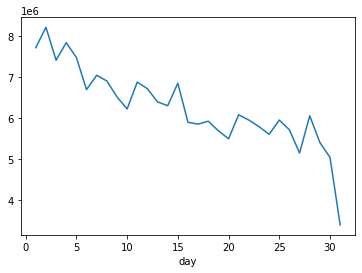

In [60]:
total_sale = sales_2017.groupby(['day'])['sales'].sum()
#total_sale = total_sale.sort_index()
#total_sale.plot(x=total_sale.index, y=total_sale.values, ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
total_sale.plot()
#plt.show()
#earth__quake =df_train.loc[df_train['date'] == '2016-04-17']
#earth__quake
#April 16, 2016
#total_sale.plot.bar()
total_sale

<AxesSubplot:xlabel='day'>

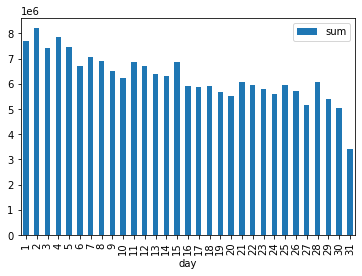

In [62]:
total_sal = sales_2017.groupby(['day'])['sales'].agg(["sum"])
#total_sales = df_train.groupby(['year'])['sales'].sum()
#total_sales = df_train.groupby(['year'].as_index=False)['sales'].sum()
#total_sales1 = total_sales.sort_index()
total_sal.plot.bar()


<AxesSubplot:xlabel='month'>

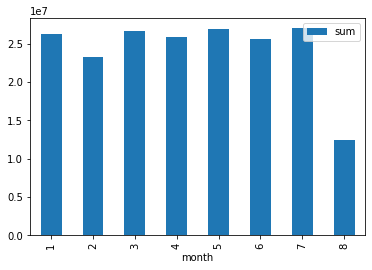

In [63]:
total_sal = sales_2017.groupby(['month'])['sales'].agg(["sum"])
#total_sales = df_train.groupby(['year'])['sales'].sum()
#total_sales = df_train.groupby(['year'].as_index=False)['sales'].sum()
#total_sales1 = total_sales.sort_index()
total_sal.plot.bar()


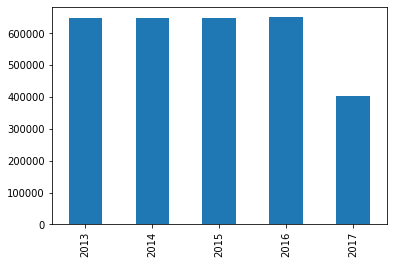

2013    648648
2014    648648
2015    648648
2016    650430
2017    404514
Name: year, dtype: int64

In [19]:
#volume of sales transaction/ number of sales transactions by year
sales_count = df_train["year"].value_counts(sort=False)
#tran_count = transactions["transactions"].value_counts(sort=False)
sales_count.plot.bar()
plt.show()
sales_count
#tran_count

The number of individuals sales are the same for all years except 2017 which is less than the rest of the years. Further analysis reveled that , the data for 2017 was collected between 1st january and August 15. This may account for the year having less number of sales transactions than the other years.

In [20]:
zz= pd.Categorical(pd.unique(df_train['sales']))
#z= df_train['sales'].nsmallest()
#zz= z.nsmallest(n=12)
#z=df_train.groupby(['sales'])['sales'].nsmallest(n=12)
#z= df_train['sales'].nsmallest(n=12)
u = df_train['sales'].nlargest(n=2)
#total_sales
zz,u

C:\Users\SISEY\anaconda3\envs\pythonEnv\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


([0.000000000, 2.000000000, 810.000000000, 180.589000000, 186.000000000, ..., 551.713000000, 6630.383000000, 438.133000000, 154.553000000, 2419.729000000]
 Length: 379610
 Categories (379610, float64): [0.000000000, 0.122000000, 0.146000000, 0.154000000, ..., 76090.000000000, 87438.516000000, 89576.360000000, 124717.000000000],
 2163723   124717.000000000
 2445984    89576.360000000
 Name: sales, dtype: float64)

(124717, 0)

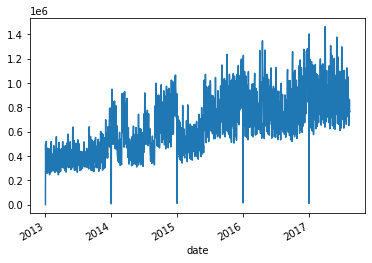

In [21]:
total_sales = df_train.groupby(['date'])['sales'].sum()
#total_sales = df_train.groupby(['year'])['sales'].sum()
#total_sales = df_train.groupby(['year'].as_index=False)['sales'].sum()
#total_sales1 = total_sales.sort_index()
total_sales.plot()
#plt.show()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
#z= float(total_sales.min())
z= int(df_train['sales'].max())
u = int(df_train['sales'].min())
#total_sales
z,u

In [22]:
df_train.loc[df_train['sales'] == z]
df_train.loc[df_train['sales'] == 1]



,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,week,quarter,day_of_week
1883,1883,2013-01-02,12,BEAUTY,1.000000000,0,1362.000000000,Latacunga,Cotopaxi,C,15,2013,1,2,1,1,Wednesday
1946,1946,2013-01-02,13,SEAFOOD,1.000000000,0,1102.000000000,Latacunga,Cotopaxi,C,15,2013,1,2,1,1,Wednesday
1994,1994,2013-01-02,15,HARDWARE,1.000000000,0,1622.000000000,Ibarra,Imbabura,C,15,2013,1,2,1,1,Wednesday
2079,2079,2013-01-02,18,AUTOMOTIVE,1.000000000,0,1635.000000000,Quito,Pichincha,B,16,2013,1,2,1,1,Wednesday
2134,2134,2013-01-02,19,"LIQUOR,WINE,BEER",1.000000000,0,1369.000000000,Guaranda,Bolivar,C,15,2013,1,2,1,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000770,3000770,2017-08-15,6,HARDWARE,1.000000000,0,1589.000000000,Quito,Pichincha,D,13,2017,8,15,33,3,Tuesday
3000803,3000803,2017-08-15,7,HARDWARE,1.000000000,0,1780.000000000,Quito,Pichincha,D,8,2017,8,15,33,3,Tuesday
3000806,3000806,2017-08-15,7,HOME APPLIANCES,1.000000000,0,1780.000000000,Quito,Pichincha,D,8,2017,8,15,33,3,Tuesday
3000823,3000823,2017-08-15,8,BABY CARE,1.000000000,0,2621.000000000,Quito,Pichincha,D,8,2017,8,15,33,3,Tuesday


,sum
year,
2013,140419013.919617206
2014,209474246.301543891
2015,240880100.654740214
2016,288654522.953896105
2017,194217068.373271108


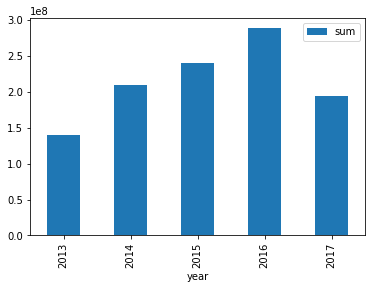

In [23]:
total_sales = df_train.groupby(['year'])['sales'].agg(["sum"])
#total_sales = df_train.groupby(['year'])['sales'].sum()
#total_sales = df_train.groupby(['year'].as_index=False)['sales'].sum()
#total_sales1 = total_sales.sort_index()
total_sales.plot.bar()
#plt.show()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
total_sales.min(),total_sales.max()
total_sales

,sum
month,
1,94442152.316650599
2,80637229.435735896
3,97228487.147018999
4,90668117.557454005
5,94399137.023353994
6,94516703.291864499
7,103363060.689176396
8,83472376.838480800
9,77473679.920585394


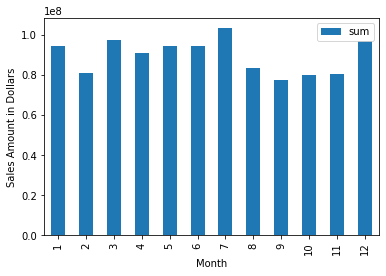

In [24]:

total_sales_bydate = df_train.groupby(['month'])['sales'].agg(["sum"])
#otal_sales2 = total_sales2.sort_index()
total_sales_bydate.plot.bar(ylabel= 'Sales Amount in Dollars',xlabel='Month')
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
#data1
total_sales_bydate

<AxesSubplot:xlabel='day_of_week'>

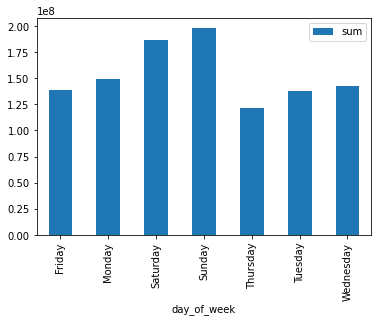

In [25]:

total_sales_byday = df_train.groupby(['day_of_week'])['sales'].agg(["sum"])
#total_sales_byday = df_train.groupby(['sales'])['day_of_week'].agg(["sum"])
total_sales_byday = total_sales_byday.sort_index(axis =0)
total_sales_byday.plot.bar()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')


,sum
day_of_week,
Friday,139097846.660344005
Monday,148827793.845641613
Saturday,186101548.140181512
Sunday,198052349.179052293
Thursday,121264608.267489597
Tuesday,137922113.277135998
Wednesday,142378692.833223492


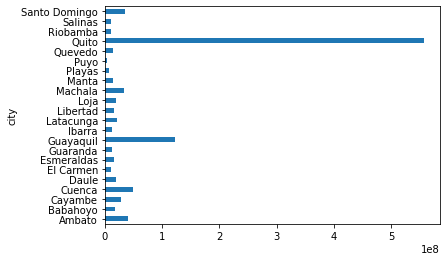

In [26]:
#Sales by city
total_sales_city = df_train.groupby(['city'])['sales'].sum()
total_sales_city = total_sales_city.sort_index()
total_sales_city.plot.barh()

total_sales_byday

,sum
state,
Azuay,49168596.033181101
Bolivar,13049509.836733000
Chimborazo,11387918.748218000
Cotopaxi,21182263.775176000
El Oro,33386796.544552401
Esmeraldas,16391692.211909600
Guayas,165154392.381637990
Imbabura,11451270.022647999
Loja,18859999.260529600


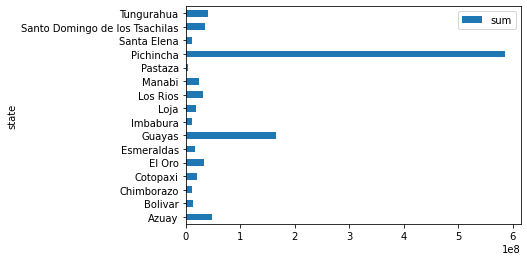

In [27]:
#Sales by state
total_sales_state = df_train.groupby(['state'])['sales'].agg(["sum"])

total_sales_state = total_sales_state.sort_index()
total_sales_state.head(20).plot.barh()

total_sales_state

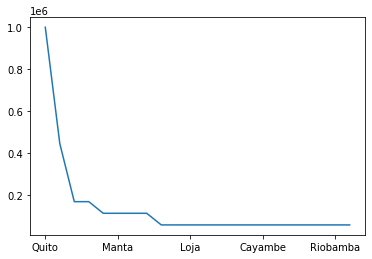

Quito            1000296
Guayaquil         444576
Santo Domingo     166716
Cuenca            166716
Latacunga         111144
Manta             111144
Machala           111144
Ambato            111144
Quevedo            55572
Esmeraldas         55572
Loja               55572
Libertad           55572
Playas             55572
Daule              55572
Babahoyo           55572
Cayambe            55572
Salinas            55572
Puyo               55572
Guaranda           55572
Ibarra             55572
Riobamba           55572
El Carmen          55572
Name: city, dtype: int64

In [28]:
#volume of transaction/ number of transactions by year
#sales_count = df_train.groupby(['city'])['store_nbr'].value_counts()
sales_count = df_train['city'].value_counts()
#sales_count = df_train["year"].value_counts(sort=False)
#sales_count.plot.line(x=sales_counts.index, y=sales_counts.values)
sales_count.plot.line()
plt.show()
sales_count

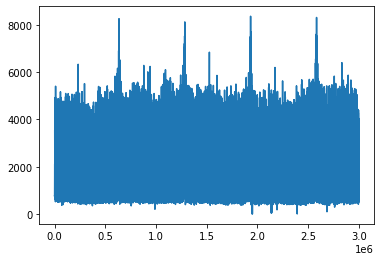

In [29]:
z = df_train['transactions']
z.plot()
plt.show()


In [30]:
missing_values = df_train.isnull().sum().sort_values(ascending =True)
missing_values

id              0
week            0
day             0
month           0
year            0
cluster         0
type            0
quarter         0
state           0
transactions    0
onpromotion     0
sales           0
family          0
store_nbr       0
date            0
city            0
day_of_week     0
dtype: int64

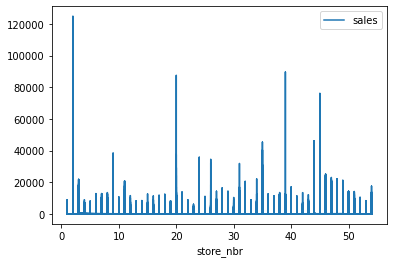

In [31]:
train.plot(x="store_nbr", y="sales")
plt.show()

In [32]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0
1,1,2013-01-01,1,BABY CARE,0.000000000,0
2,2,2013-01-01,1,BEAUTY,0.000000000,0
3,3,2013-01-01,1,BEVERAGES,0.000000000,0
4,4,2013-01-01,1,BOOKS,0.000000000,0


In [33]:
#merging the 5 datasets
df_train1 = train.merge(transactions, on = ['date', 'store_nbr'], how='left')
df_train1 = df_train1.merge(stores, on = 'store_nbr', how='left')
df_train1 = df_train1.merge(oil, on = 'date', how='left')
df_train1 = train.merge(holidays, on = 'date', how='left')
#df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
df_train1.head()


,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False


In [34]:
#Breaking the year column into day, month, year, day of the week, and week so we can aggregate the data by those parameters
df_train1['date'] = pd.to_datetime(df_train1['date'])
df_train1['year'] = df_train1['date'].dt.year
df_train1['month'] = df_train1['date'].dt.month
df_train1['week'] = df_train1['date'].dt.isocalendar().week
df_train1['quarter'] = df_train1['date'].dt.quarter
df_train1['day_of_week'] = df_train1['date'].dt.day_name()
df_train1[:2]

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday


In [35]:
a = df_train1["year"].value_counts(sort=False)
a
#plt.show()

2013    657558
2014    659340
2015    655776
2016    670032
2017    411642
Name: year, dtype: int64

In [36]:
#b = df_train1["store_nbr"].unique()
b= stores["city"].value_counts(sort=False)
#b = stores["city"].unique()
b


Quito            18
Santo Domingo     3
Cayambe           1
Latacunga         2
Riobamba          1
Ibarra            1
Guaranda          1
Puyo              1
Ambato            2
Guayaquil         8
Salinas           1
Daule             1
Babahoyo          1
Quevedo           1
Playas            1
Libertad          1
Cuenca            3
Loja              1
Machala           2
Esmeraldas        1
Manta             2
El Carmen         1
Name: city, dtype: int64

In [37]:
missing_values = df_train1.isnull().sum().sort_values(ascending =True)
missing_values

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
year                 0
month                0
week                 0
quarter              0
day_of_week          0
type           2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

In [38]:
#merging the 5 dataset
df1 = holidays.merge(train, on = 'date', how='left')
df1 = df1.merge(stores, on = 'store_nbr', how='left')
df1


,date,type_x,locale,locale_name,description,transferred,id,store_nbr,family,sales,onpromotion,city,state,type_y,cluster
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502587,2017-12-22,Additional,National,Ecuador,Navidad-3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502588,2017-12-23,Additional,National,Ecuador,Navidad-2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502589,2017-12-24,Additional,National,Ecuador,Navidad-1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502590,2017-12-25,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Dropping missing values
df1.dropna(inplace=True)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 502524 entries, 41 to 502568
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         502524 non-null  object 
 1   type_x       502524 non-null  object 
 2   locale       502524 non-null  object 
 3   locale_name  502524 non-null  object 
 4   description  502524 non-null  object 
 5   transferred  502524 non-null  bool   
 6   id           502524 non-null  float64
 7   store_nbr    502524 non-null  float64
 8   family       502524 non-null  object 
 9   sales        502524 non-null  float64
 10  onpromotion  502524 non-null  float64
 11  city         502524 non-null  object 
 12  state        502524 non-null  object 
 13  type_y       502524 non-null  object 
 14  cluster      502524 non-null  float64
dtypes: bool(1), float64(5), object(9)
memory usage: 58.0+ MB


,sum
type_x,
Additional,33020280.296149399
Bridge,2388330.065253000
Event,42477469.226148501
Holiday,109222667.922416702
Transfer,7501824.379538600
Work Day,3315923.537532500


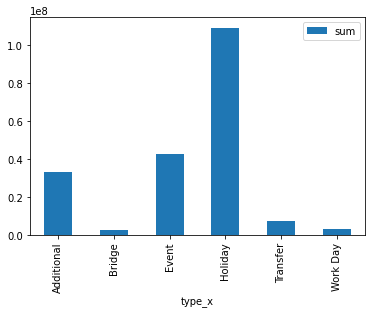

In [40]:
tota = df1.groupby(['type_x'])['sales'].agg(["sum"])
#total_sales2 = total_sales2.sort_index()
tota.plot.bar()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
tota

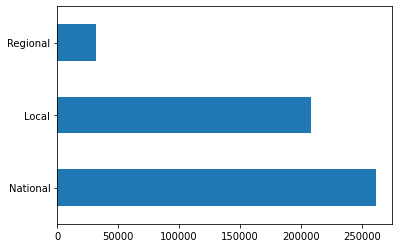

In [41]:
b= df1["locale"].value_counts(sort=True)
b.plot.barh()
plt.show()

In [42]:
missing_values = df1.isnull().sum().sort_values(ascending =True)
missing_values

date           0
type_x         0
locale         0
locale_name    0
description    0
transferred    0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type_y         0
cluster        0
dtype: int64

In [43]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [64]:
#Checking for completeness of the dates
train.date.min(), train.date.max()
train['sales_date'] = pd.to_datetime(train['date']).dt.date
train['sales_date'].min(), train['sales_date'].max()
#expected number of days
#difference =(train['sales_date'].max - train['sales_date'].min())
difference =(train['sales_date'].max() - train['sales_date'].min())
difference.days + 1

1688

In [65]:
#Actual number of days
train['sales_date'].nunique()

1684

In [48]:
#Missing dates
expected_dates = pd.date_range(start =train['sales_date'].min(), end= train['sales_date'].max())
set(expected_dates.date) - set(train['sales_date'].unique())

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 12, 25)}

In [49]:
#df = train.append({'date':'2013, 12, 25','2014, 12, 25','2015, 12, 25','2016, 12, 25'}, ignore_index=True)
df = train.append({'date':'2013, 12, 25'}, ignore_index=True)

C:\Users\SISEY\AppData\Local\Temp\ipykernel_19332\2357646388.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append({'date':'2013, 12, 25'}, ignore_index=True)


In [50]:
df

,id,date,store_nbr,family,sales,onpromotion,sales_date
0,0.000000000,2013-01-01,1.000000000,AUTOMOTIVE,0.000000000,0.000000000,2013-01-01
1,1.000000000,2013-01-01,1.000000000,BABY CARE,0.000000000,0.000000000,2013-01-01
2,2.000000000,2013-01-01,1.000000000,BEAUTY,0.000000000,0.000000000,2013-01-01
3,3.000000000,2013-01-01,1.000000000,BEVERAGES,0.000000000,0.000000000,2013-01-01
4,4.000000000,2013-01-01,1.000000000,BOOKS,0.000000000,0.000000000,2013-01-01
...,...,...,...,...,...,...,...
3000884,3000884.000000000,2017-08-15,9.000000000,PREPARED FOODS,154.553000000,1.000000000,2017-08-15
3000885,3000885.000000000,2017-08-15,9.000000000,PRODUCE,2419.729000000,148.000000000,2017-08-15
3000886,3000886.000000000,2017-08-15,9.000000000,SCHOOL AND OFFICE SUPPLIES,121.000000000,8.000000000,2017-08-15
3000887,3000887.000000000,2017-08-15,9.000000000,SEAFOOD,16.000000000,0.000000000,2017-08-15


In [51]:
store

Stored variables and their in-db values:


In [52]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [53]:
a =stores["city"].value_counts(sort=False)
a

Quito            18
Santo Domingo     3
Cayambe           1
Latacunga         2
Riobamba          1
Ibarra            1
Guaranda          1
Puyo              1
Ambato            2
Guayaquil         8
Salinas           1
Daule             1
Babahoyo          1
Quevedo           1
Playas            1
Libertad          1
Cuenca            3
Loja              1
Machala           2
Esmeraldas        1
Manta             2
El Carmen         1
Name: city, dtype: int64